In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [3]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=0.3)

Using a total of 4392 tweets
Training sample size: 3961
Testing sample size: 431


In [4]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    return {
        'classifier': classifier,
        'evaluation': evaluation,
        'trainer': trainer,
    }

Unigram features 676
Bigram features:  205


## Gradient Descent

In [5]:
from sklearn.linear_model import SGDClassifier
from nltk.classify import SklearnClassifier

evaluations = []
c_range = [0.00001, 0.0001, 0.001, 0.01]
for c in c_range: 
    trainer = {
    "name": "Linear SVM with Gradient Descent Classifier",
    "train": SklearnClassifier(SGDClassifier(alpha = c)).train,
    }
    print("Training with c = ", c, "\n")
    evaluations.append(evaluate_trainer(trainer))



Training with c =  1e-05 

Training: Linear SVM with Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with c =  0.0001 

Training: Linear SVM with Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with c =  0.001 

Training: Linear SVM with Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with c =  0.01 

Training: Linear SVM with Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...


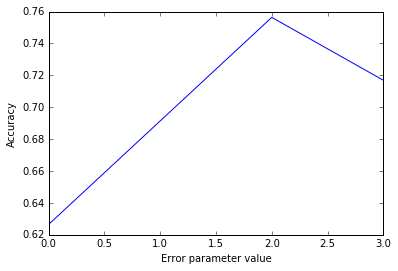

In [7]:
accuracies = [e['evaluation']['Accuracy'] for e in evaluations]
plt.plot(range(len(c_range)), accuracies)
plt.xlabel("Error parameter value")
plt.ylabel("Accuracy")

# Concluzie

### Valoarea optima pentru alpha este 2


In [8]:
print(len(c_range))

4
